# Portfolio with the Maximum Sortino Ratio for the PSU Banks Sector

In [1]:
from pandas_datareader import data
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Establishing Dates
start = "2017-01-01"
end = "2021-12-31"

# Establishing Assets
assets = ['SBIN.NS', 'BANKBARODA.NS', 'CANBK.NS', 'PNB.NS', 'UNIONBANK.NS',
         'BANKINDIA.NS', 'INDIANB.NS', 'IOB.NS', 'CENTRALBK.NS', 'MAHABANK.NS']

#252 trading days in a year
N = 252

#1% risk free rate
rf =0.02

# Creating an empty dataframe
df_prices = pd.DataFrame()

# Getting the "Adj Close" data from Yahoo Finance by defining a function
# This function lists the price data as daily percent change 
def YahooData(dataframe, assets_list, start_date, end_date):
    for i in assets_list:
        dataframe[i] = data.DataReader(i, data_source = "yahoo", start=start_date, end=end_date)['Adj Close']
    return dataframe

# Running the function that we just made and saving the results to the DataFrame
df = YahooData(df_prices, assets, start, end)

In [3]:
df.to_csv("psu_banks.csv")

In [2]:
df = pd.read_csv("psu_banks.csv", index_col=0)

In [3]:
df.head()

SBIN.NS  BANKBARODA.NS    CANBK.NS      PNB.NS  UNIONBANK.NS  \
Date                                                                          
2017-01-02  239.208252     147.830048  254.555588  115.599998    125.550003   
2017-01-03  240.484818     147.532227  256.834900  118.050003    126.250000   
2017-01-04  238.520859     146.936523  255.961960  115.250000    125.550003   
2017-01-05  240.926697     149.865326  258.338257  117.650002    127.900002   
2017-01-06  241.466782     152.148804  262.217957  119.050003    129.149994   

            BANKINDIA.NS  INDIANB.NS     IOB.NS  CENTRALBK.NS  MAHABANK.NS  
Date                                                                        
2017-01-02    107.449997  211.693939  24.150000     84.599998    29.049999  
2017-01-03    108.349998  213.025345  24.400000     84.000000    29.150000  
2017-01-04    107.699997  214.642044  24.299999     83.750000    29.150000  
2017-01-05    109.550003  216.401413  24.549999     83.750000    29.250000  
2017-01-06    110.550003  222.678055  24.549999     83.449997    29.200001

In [4]:
# Calculating Log Return
df = np.log(df/df.shift(1))

# Dropping the first row because it's N/A
df = df.dropna()

# Viewing df head
df

SBIN.NS  BANKBARODA.NS  CANBK.NS    PNB.NS  UNIONBANK.NS  \
Date                                                                    
2017-01-03  0.005322      -0.002017  0.008914  0.020972      0.005560   
2017-01-04 -0.008200      -0.004046 -0.003405 -0.024005     -0.005560   
2017-01-05  0.010036       0.019736  0.009241  0.020610      0.018545   
2017-01-06  0.002239       0.015122  0.014906  0.011829      0.009726   
2017-01-09  0.004666      -0.002941 -0.001295  0.005863     -0.011682   
...              ...            ...       ...       ...           ...   
2021-12-27  0.002404       0.005022  0.008471  0.010796     -0.003486   
2021-12-28  0.006853       0.013064  0.011437  0.001341      0.027556   
2021-12-29 -0.014854       0.000618 -0.005829 -0.004029     -0.013683   
2021-12-30 -0.005960      -0.009932 -0.008680  0.000000     -0.017372   
2021-12-31  0.019186       0.022209  0.025068  0.004029      0.013921   

            BANKINDIA.NS  INDIANB.NS    IOB.NS  CENTRALBK.NS  MAHABANK.NS  
Date                                                                       
2017-01-03      0.008341    0.006270  0.010299     -0.007117     0.003436  
2017-01-04     -0.006017    0.007561 -0.004107     -0.002981     0.000000  
2017-01-05      0.017032    0.008163  0.010236      0.000000     0.003425  
2017-01-06      0.009087    0.028592  0.000000     -0.003589    -0.001711  
2017-01-09      0.005862    0.003411  0.008114     -0.001199     0.005124  
...                  ...         ...       ...           ...          ...  
2021-12-27     -0.008768   -0.010598 -0.014528     -0.020714    -0.005115  
2021-12-28      0.004880    0.035370  0.004866      0.000000     0.000000  
2021-12-29      0.000000   -0.009621 -0.004866     -0.002328    -0.010309  
2021-12-30     -0.009785   -0.012611 -0.007344     -0.009368    -0.013038  
2021-12-31      0.010758    0.012252  0.000000      0.000000     0.007843  

[1235 rows x 10 columns]

In [5]:
assets = ['SBIN.NS', 'BANKBARODA.NS', 'CANBK.NS', 'PNB.NS', 'UNIONBANK.NS',
         'BANKINDIA.NS', 'INDIANB.NS', 'IOB.NS', 'CENTRALBK.NS', 'MAHABANK.NS']

# Creating 10000 random simulations of each portfolio weight configuration
num_runs = 10000 # number of rows/iterations

# Creating a Matrix with 10000 rows, with each row representing a random portfolio:
    #first 3 columns are Mean Returns, Standard Deviation, and Sortino Ratio
    # remaining columns are each assets random weight within that random portfolio
result = np.zeros((num_runs,(len(assets)+5)))
result

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
df.shape

(1235, 10)

In [7]:
df.head()

SBIN.NS  BANKBARODA.NS  CANBK.NS    PNB.NS  UNIONBANK.NS  \
Date                                                                    
2017-01-03  0.005322      -0.002017  0.008914  0.020972      0.005560   
2017-01-04 -0.008200      -0.004046 -0.003405 -0.024005     -0.005560   
2017-01-05  0.010036       0.019736  0.009241  0.020610      0.018545   
2017-01-06  0.002239       0.015122  0.014906  0.011829      0.009726   
2017-01-09  0.004666      -0.002941 -0.001295  0.005863     -0.011682   

            BANKINDIA.NS  INDIANB.NS    IOB.NS  CENTRALBK.NS  MAHABANK.NS  
Date                                                                       
2017-01-03      0.008341    0.006270  0.010299     -0.007117     0.003436  
2017-01-04     -0.006017    0.007561 -0.004107     -0.002981     0.000000  
2017-01-05      0.017032    0.008163  0.010236      0.000000     0.003425  
2017-01-06      0.009087    0.028592  0.000000     -0.003589    -0.001711  
2017-01-09      0.005862    0.003411  0.008114     -0.001199     0.005124

In [8]:
df_training = df[0:987]
df_training.columns

Index(['SBIN.NS', 'BANKBARODA.NS', 'CANBK.NS', 'PNB.NS', 'UNIONBANK.NS',
       'BANKINDIA.NS', 'INDIANB.NS', 'IOB.NS', 'CENTRALBK.NS', 'MAHABANK.NS'],
      dtype='object')

In [9]:
df_training.shape

(987, 10)

In [10]:
df_training.tail()

SBIN.NS  BANKBARODA.NS  CANBK.NS    PNB.NS  UNIONBANK.NS  \
Date                                                                    
2020-12-24  0.014533       0.004942  0.000414 -0.011067      0.008396   
2020-12-28  0.030811       0.025154  0.036589  0.029759      0.019868   
2020-12-29  0.009763      -0.000802  0.008744  0.024391      0.044879   
2020-12-30 -0.003605      -0.004018  0.023466 -0.013647      0.001566   
2020-12-31 -0.007067      -0.010522 -0.003097  0.009119     -0.012599   

            BANKINDIA.NS  INDIANB.NS    IOB.NS  CENTRALBK.NS  MAHABANK.NS  
Date                                                                       
2020-12-24      0.004098    0.012227  0.000000      0.003617     0.003781  
2020-12-28      0.010173    0.023450  0.009390      0.014337     0.003766  
2020-12-29      0.000000   -0.001697 -0.009390     -0.010734    -0.011342  
2020-12-30     -0.004057   -0.014257 -0.009479     -0.010850    -0.007634  
2020-12-31     -0.010215   -0.015630  0.018868      0.007246     0.000000

In [11]:
df_test= df[987:]
df_test.head()

SBIN.NS  BANKBARODA.NS  CANBK.NS    PNB.NS  UNIONBANK.NS  \
Date                                                                    
2021-01-01  0.016055       0.048441  0.033178  0.051596      0.017282   
2021-01-04  0.005888       0.019955  0.005238  0.021323      0.009302   
2021-01-05  0.002488      -0.003044  0.010394  0.001405     -0.010861   
2021-01-06  0.011644      -0.001526 -0.024674 -0.011299     -0.006260   
2021-01-07  0.009254       0.009875  0.006790  0.007077      0.001569   

            BANKINDIA.NS  INDIANB.NS    IOB.NS  CENTRALBK.NS  MAHABANK.NS  
Date                                                                       
2021-01-01      0.029339    0.030453  0.009302      0.017890     0.044951  
2021-01-04      0.003980    0.003954  0.045257      0.003540     0.003656  
2021-01-05      0.003964   -0.009629  0.004415     -0.003540    -0.014706  
2021-01-06      0.012777   -0.001139 -0.017778     -0.007117    -0.011173  
2021-01-07     -0.000977   -0.004569  0.000000      0.003565     0.018553

In [12]:
df_test.shape

(248, 10)

In [15]:
#df = df.copy()
for i in range(num_runs):
    
    # randomized weights
    weights = np.array(np.random.random(len(assets))) 
    #Rebalance w/ constraints (SUM of all weights CANNOT BE > 1)
    weights = weights/np.sum(weights)
    
    # daily return of the portfolio based on a given set of weights
    df_training['portfolio_ret'] = df_training.iloc[:,0]*weights[0]+df_training.iloc[:,1]*weights[1]+df_training.iloc[:,2]*weights[2]
    
    # Calculating Mean
    E = df_training['portfolio_ret'].mean()
    # Annualizing Mean
    E_AN = E * N
    
    # Calculating Downside Standard Deviation
    mean = E * N -rf
    std_neg = df_training['portfolio_ret'][df_training['portfolio_ret']<0].std()*np.sqrt(N)
    
    
    # Calculating Upside Standard Deviation
    std_pos = df_training['portfolio_ret'][df_training['portfolio_ret']>=0].std()*np.sqrt(N)
    
    # Calculating Volatility Skewness
    VS = std_pos/std_neg
    
    # Sortino
    Sortino = mean/std_neg
   
    # Populating the 'result' array with the required values: Mean, SD, Sharpe followed by the weights                   
    result[i,0] = E_AN
    result[i,1] = std_neg
    result[i,2] = std_pos
    result[i,3] = VS
    result[i,4] = Sortino
    
    for j in range(len(assets)):
        result[i,j+5]= weights[j]

In [16]:
# Converting 'result' into a DataFrame

columns = ['Mean','Downside SD', 'Upside SD', 'Volatility Skewness', 'Sortino'] + assets

result = pd.DataFrame(result,columns=columns)
result

Mean  Downside SD  Upside SD  Volatility Skewness   Sortino  \
0    -0.035900     0.062165   0.067770             1.090170 -0.899227   
1    -0.011350     0.060300   0.065989             1.094354 -0.519894   
2    -0.042877     0.105286   0.116232             1.103957 -0.597195   
3    -0.041246     0.097947   0.107706             1.099636 -0.625300   
4    -0.046203     0.087731   0.097311             1.109195 -0.754610   
...        ...          ...        ...                  ...       ...   
9995 -0.015696     0.080322   0.086491             1.076796 -0.444412   
9996 -0.079759     0.159100   0.175747             1.104635 -0.627024   
9997 -0.019633     0.052739   0.058235             1.104211 -0.751480   
9998 -0.019651     0.030301   0.032600             1.075875 -1.308553   
9999 -0.015501     0.107619   0.116166             1.079425 -0.329874   

       SBIN.NS  BANKBARODA.NS  CANBK.NS    PNB.NS  UNIONBANK.NS  BANKINDIA.NS  \
0     0.041618       0.147981  0.023701  0.034080      0.190843      0.153368   
1     0.140881       0.030953  0.052352  0.130662      0.209648      0.080112   
2     0.151444       0.152588  0.078934  0.154839      0.083984      0.062714   
3     0.145149       0.185218  0.026224  0.104412      0.003305      0.215831   
4     0.064971       0.132894  0.106974  0.008217      0.065215      0.117653   
...        ...            ...       ...       ...           ...           ...   
9995  0.168005       0.009087  0.110796  0.057063      0.154458      0.048703   
9996  0.117324       0.183091  0.245446  0.044148      0.057444      0.003903   
9997  0.088155       0.081664  0.024514  0.149559      0.168697      0.153997   
9998  0.008922       0.084301  0.006061  0.145443      0.145966      0.095713   
9999  0.254743       0.006088  0.130128  0.092475      0.025477      0.008418   

      INDIANB.NS    IOB.NS  CENTRALBK.NS  MAHABANK.NS  
0       0.091136  0.116623      0.078301     0.122350  
1       0.038848  0.168943      0.045374     0.102228  
2       0.115881  0.063410      0.028023     0.108182  
3       0.072139  0.151345      0.065714     0.030663  
4       0.121908  0.185810      0.119968     0.076389  
...          ...       ...           ...          ...  
9995    0.162541  0.082683      0.044023     0.162641  
9996    0.003746  0.057312      0.074509     0.213077  
9997    0.099857  0.038588      0.087234     0.107734  
9998    0.144971  0.117042      0.116909     0.134673  
9999    0.149579  0.160526      0.148045     0.024521  

[10000 rows x 15 columns]

In [17]:
result.head()

Mean  Downside SD  Upside SD  Volatility Skewness   Sortino   SBIN.NS  \
0 -0.035900     0.062165   0.067770             1.090170 -0.899227  0.041618   
1 -0.011350     0.060300   0.065989             1.094354 -0.519894  0.140881   
2 -0.042877     0.105286   0.116232             1.103957 -0.597195  0.151444   
3 -0.041246     0.097947   0.107706             1.099636 -0.625300  0.145149   
4 -0.046203     0.087731   0.097311             1.109195 -0.754610  0.064971   

   BANKBARODA.NS  CANBK.NS    PNB.NS  UNIONBANK.NS  BANKINDIA.NS  INDIANB.NS  \
0       0.147981  0.023701  0.034080      0.190843      0.153368    0.091136   
1       0.030953  0.052352  0.130662      0.209648      0.080112    0.038848   
2       0.152588  0.078934  0.154839      0.083984      0.062714    0.115881   
3       0.185218  0.026224  0.104412      0.003305      0.215831    0.072139   
4       0.132894  0.106974  0.008217      0.065215      0.117653    0.121908   

     IOB.NS  CENTRALBK.NS  MAHABANK.NS  
0  0.116623      0.078301     0.122350  
1  0.168943      0.045374     0.102228  
2  0.063410      0.028023     0.108182  
3  0.151345      0.065714     0.030663  
4  0.185810      0.119968     0.076389

In [13]:
df.head()

SBIN.NS  BANKBARODA.NS  CANBK.NS    PNB.NS  UNIONBANK.NS  \
Date                                                                    
2017-01-03  0.005322      -0.002017  0.008914  0.020972      0.005560   
2017-01-04 -0.008200      -0.004046 -0.003405 -0.024005     -0.005560   
2017-01-05  0.010036       0.019736  0.009241  0.020610      0.018545   
2017-01-06  0.002239       0.015122  0.014906  0.011829      0.009726   
2017-01-09  0.004666      -0.002941 -0.001295  0.005863     -0.011682   

            BANKINDIA.NS  INDIANB.NS    IOB.NS  CENTRALBK.NS  MAHABANK.NS  
Date                                                                       
2017-01-03      0.008341    0.006270  0.010299     -0.007117     0.003436  
2017-01-04     -0.006017    0.007561 -0.004107     -0.002981     0.000000  
2017-01-05      0.017032    0.008163  0.010236      0.000000     0.003425  
2017-01-06      0.009087    0.028592  0.000000     -0.003589    -0.001711  
2017-01-09      0.005862    0.003411  0.008114     -0.001199     0.005124

In [14]:
df_training = df[0:987]
df_training.columns

Index(['SBIN.NS', 'BANKBARODA.NS', 'CANBK.NS', 'PNB.NS', 'UNIONBANK.NS',
       'BANKINDIA.NS', 'INDIANB.NS', 'IOB.NS', 'CENTRALBK.NS', 'MAHABANK.NS'],
      dtype='object')

In [15]:
df_training.shape

(987, 10)

In [16]:
df_test= df[987:]
df_test.head()

SBIN.NS  BANKBARODA.NS  CANBK.NS    PNB.NS  UNIONBANK.NS  \
Date                                                                    
2021-01-01  0.016055       0.048441  0.033178  0.051596      0.017282   
2021-01-04  0.005888       0.019955  0.005238  0.021323      0.009302   
2021-01-05  0.002488      -0.003044  0.010394  0.001405     -0.010861   
2021-01-06  0.011644      -0.001526 -0.024674 -0.011299     -0.006260   
2021-01-07  0.009254       0.009875  0.006790  0.007077      0.001569   

            BANKINDIA.NS  INDIANB.NS    IOB.NS  CENTRALBK.NS  MAHABANK.NS  
Date                                                                       
2021-01-01      0.029339    0.030453  0.009302      0.017890     0.044951  
2021-01-04      0.003980    0.003954  0.045257      0.003540     0.003656  
2021-01-05      0.003964   -0.009629  0.004415     -0.003540    -0.014706  
2021-01-06      0.012777   -0.001139 -0.017778     -0.007117    -0.011173  
2021-01-07     -0.000977   -0.004569  0.000000      0.003565     0.018553

In [17]:
df_test.shape

(248, 10)

In [23]:
Max_Sortino = result.iloc[result['Sortino'].idxmax()]
Max_Sortino

Mean                   0.006314
Downside SD            0.082685
Upside SD              0.090641
Volatility Skewness    1.096213
Sortino               -0.165524
SBIN.NS                0.294467
BANKBARODA.NS          0.005296
CANBK.NS               0.013119
PNB.NS                 0.094210
UNIONBANK.NS           0.151209
BANKINDIA.NS           0.224133
INDIANB.NS             0.051660
IOB.NS                 0.021715
CENTRALBK.NS           0.103471
MAHABANK.NS            0.040720
Name: 9710, dtype: float64

In [24]:
Min_DSD = result.iloc[result['Downside SD'].idxmin()]
Min_DSD

Mean                  -0.002017
Downside SD            0.006349
Upside SD              0.006894
Volatility Skewness    1.085804
Sortino               -3.467738
SBIN.NS                0.009970
BANKBARODA.NS          0.003327
CANBK.NS               0.009227
PNB.NS                 0.216484
UNIONBANK.NS           0.127199
BANKINDIA.NS           0.132749
INDIANB.NS             0.148178
IOB.NS                 0.149069
CENTRALBK.NS           0.007976
MAHABANK.NS            0.195821
Name: 1363, dtype: float64

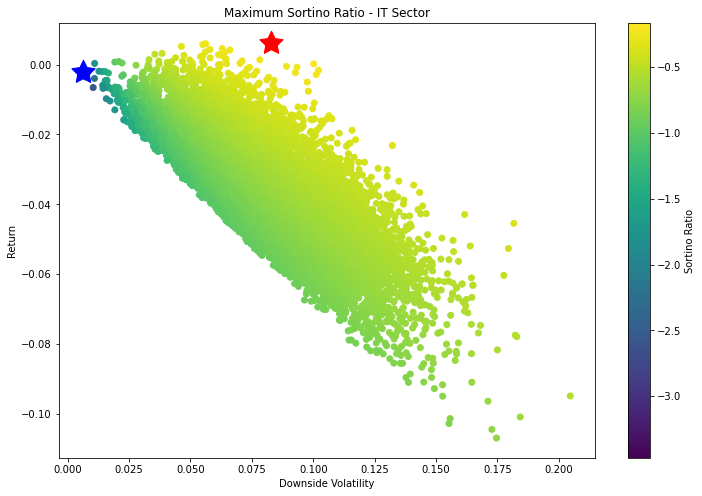

In [25]:
plt.figure(figsize=(12,8))
plt.scatter(x=result['Downside SD'],y=result['Mean'],c=result['Sortino'],cmap='viridis')
plt.colorbar(label='Sortino Ratio')
plt.xlabel('Downside Volatility')
plt.ylabel('Return')

plt.title('Maximum Sortino Ratio - IT Sector')
#Plot a red star to highlight position of the portfolio with highest Sortino Ratio
plt.scatter(Max_Sortino[1],Max_Sortino[0],marker=(5,1,0),color='r',s=600)
plt.scatter(Min_DSD[1],Min_DSD[0],marker=(5,1,0),color='b',s=600)

plt.show()

In [41]:
# Portfolio with the maximum Sharpe Ratio
w_raw = [0.3018, 0.1161, 0.1564, 0.0236, 0.0188, 0.1882, 0.0035, 0.0948, 0.0336, 0.0632]
#w_eigen = [i * 100 for i in w_raw]
print(w_raw)

w_1 = pd.DataFrame(w_raw, index = ['SBIN.NS', 'BANKBARODA.NS', 'CANBK.NS', 'PNB.NS', 'UNIONBANK.NS',
         'BANKINDIA.NS', 'INDIANB.NS', 'IOB.NS', 'CENTRALBK.NS', 'MAHABANK.NS'])
w_1.columns = ['weights']
w_1

[0.3018, 0.1161, 0.1564, 0.0236, 0.0188, 0.1882, 0.0035, 0.0948, 0.0336, 0.0632]


weights
SBIN.NS         0.3018
BANKBARODA.NS   0.1161
CANBK.NS        0.1564
PNB.NS          0.0236
UNIONBANK.NS    0.0188
BANKINDIA.NS    0.1882
INDIANB.NS      0.0035
IOB.NS          0.0948
CENTRALBK.NS    0.0336
MAHABANK.NS     0.0632

In [42]:
# Portfolio with the maximum Sortino Ratio
w_raw = [0.2945, 0.0053, 0.0131, 0.0942, 0.1512, 0.2241, 0.0517, 0.0217, 0.1035, 0.0407]
#w_eigen = [i * 100 for i in w_raw]
# print(w_raw)

w_2 = pd.DataFrame(w_raw, index = ['SBIN.NS', 'BANKBARODA.NS', 'CANBK.NS', 'PNB.NS', 'UNIONBANK.NS',
         'BANKINDIA.NS', 'INDIANB.NS', 'IOB.NS', 'CENTRALBK.NS', 'MAHABANK.NS'])
w_2.columns = ['weights']
w_2

weights
SBIN.NS         0.2945
BANKBARODA.NS   0.0053
CANBK.NS        0.0131
PNB.NS          0.0942
UNIONBANK.NS    0.1512
BANKINDIA.NS    0.2241
INDIANB.NS      0.0517
IOB.NS          0.0217
CENTRALBK.NS    0.1035
MAHABANK.NS     0.0407

In [43]:
# Portfolio with the maximum Calmar Ratio
w_raw = [0.1851, 0.0006, 0.0040, 0.1006, 0.1334, 0.2387, 0.0992, 0.1138, 0.0544, 0.0703]
#w_eigen = [i * 100 for i in w_raw]
# print(w_raw)

w_3 = pd.DataFrame(w_raw, index = ['SBIN.NS', 'BANKBARODA.NS', 'CANBK.NS', 'PNB.NS', 'UNIONBANK.NS',
         'BANKINDIA.NS', 'INDIANB.NS', 'IOB.NS', 'CENTRALBK.NS', 'MAHABANK.NS'])
w_3.columns = ['weights']
w_3

weights
SBIN.NS         0.1851
BANKBARODA.NS   0.0006
CANBK.NS        0.0040
PNB.NS          0.1006
UNIONBANK.NS    0.1334
BANKINDIA.NS    0.2387
INDIANB.NS      0.0992
IOB.NS          0.1138
CENTRALBK.NS    0.0544
MAHABANK.NS     0.0703

In [44]:
frames = [w_1, w_2, w_3]
  
result_1 = pd.concat(frames,axis=1)
#result.rename(columns={"weights": "HRP", "weights": "HERC", "weights": "EIGEN"}, inplace=True)
df_port = result_1.set_axis(['Sharpe Ratio', 'Sortino Ratio', 'Calmar Ratio'], axis=1, inplace=False)
#df3 =df3/100
display(df_port)

Sharpe Ratio  Sortino Ratio  Calmar Ratio
SBIN.NS              0.3018         0.2945        0.1851
BANKBARODA.NS        0.1161         0.0053        0.0006
CANBK.NS             0.1564         0.0131        0.0040
PNB.NS               0.0236         0.0942        0.1006
UNIONBANK.NS         0.0188         0.1512        0.1334
BANKINDIA.NS         0.1882         0.2241        0.2387
INDIANB.NS           0.0035         0.0517        0.0992
IOB.NS               0.0948         0.0217        0.1138
CENTRALBK.NS         0.0336         0.1035        0.0544
MAHABANK.NS          0.0632         0.0407        0.0703

Text(0.5, 1.0, 'Portfolio with Max Calmar Ratio')

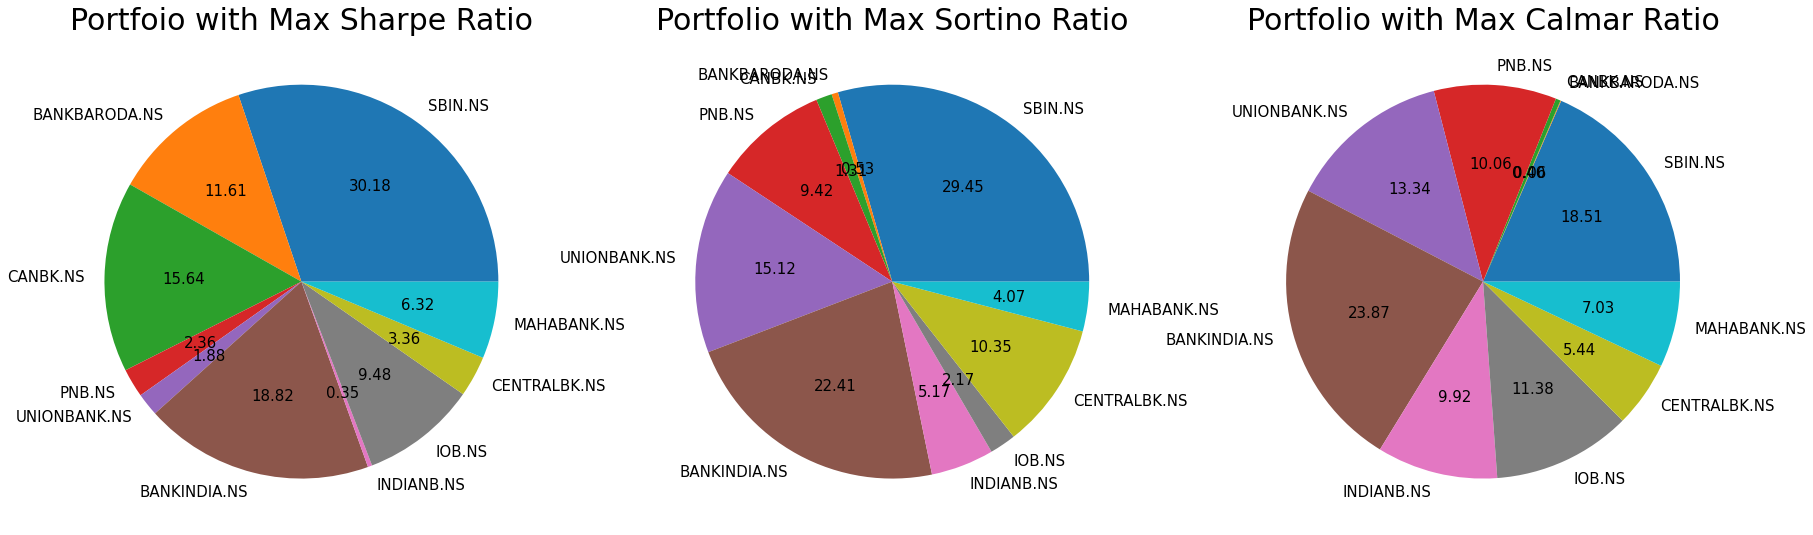

In [46]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30,20))
ax1.pie(df_port.iloc[:,0], labels= df_port.index, autopct='%.2f', textprops={'fontsize': 15});
ax1.set_title('Portfoio with Max Sharpe Ratio',fontsize = 30)
ax2.pie(df_port.iloc[:,1], labels=df_port.index, autopct='%.2f', textprops={'fontsize': 15});
ax2.set_title('Portfolio with Max Sortino Ratio',fontsize = 30)
ax3.pie(df_port.iloc[:,2], labels=df_port.index, autopct='%.2f', textprops={'fontsize': 15});
ax3.set_title('Portfolio with Max Calmar Ratio',fontsize = 30)

#portfolios.plot.pie(subplots=True, figsize=(20, 10),legend = False);

In [47]:
df_training.shape

(987, 10)

In [48]:
Insample_Result=pd.DataFrame(np.dot(df_training, np.array(df_port)), \
                             columns=['Max Sharpe Ratio Portfolio', 'Max Sortino Ratio Portfolio', 'Max Calmar Ratio Portfolio'], index = df_training.index)
OutOfSample_Result=pd.DataFrame(np.dot(df_test,np.array(df_port)), \
                                columns=['Max Sharpe Ratio Portfolio', 'Max Sortino Ratio Portfolio', 'Max Calmar Ratio Portfolio'], index = df_test.index)

In [49]:
Insample_Result.head(20)

Max Sharpe Ratio Portfolio  Max Sortino Ratio Portfolio  \
Date                                                                  
2017-01-03                    0.005912                     0.006310   
2017-01-04                   -0.005744                    -0.006938   
2017-01-05                    0.012021                     0.012527   
2017-01-06                    0.006806                     0.006593   
2017-01-09                    0.002951                     0.001878   
2017-01-10                    0.000141                     0.004821   
2017-01-11                    0.024918                     0.029239   
2017-01-12                   -0.003327                    -0.003635   
2017-01-13                    0.000288                     0.000202   
2017-01-16                    0.012897                     0.010869   
2017-01-17                    0.003623                     0.001946   
2017-01-18                    0.005415                     0.004407   
2017-01-19                    0.000611                     0.003449   
2017-01-20                   -0.030210                    -0.026277   
2017-01-23                    0.008204                     0.011519   
2017-01-24                    0.006199                     0.006796   
2017-01-25                    0.015624                     0.014316   
2017-01-27                    0.019058                     0.016691   
2017-01-30                    0.010394                     0.013174   
2017-01-31                   -0.013097                    -0.014878   

            Max Calmar Ratio Portfolio  
Date                                    
2017-01-03                    0.007511  
2017-01-04                   -0.006006  
2017-01-05                    0.012735  
2017-01-06                    0.007660  
2017-01-09                    0.002844  
2017-01-10                    0.003116  
2017-01-11                    0.031618  
2017-01-12                   -0.003203  
2017-01-13                    0.000983  
2017-01-16                    0.010690  
2017-01-17                    0.001841  
2017-01-18                    0.003585  
2017-01-19                    0.003062  
2017-01-20                   -0.025103  
2017-01-23                    0.010496  
2017-01-24                    0.008896  
2017-01-25                    0.016912  
2017-01-27                    0.013154  
2017-01-30                    0.017464  
2017-01-31                   -0.013312

<AxesSubplot:xlabel='Date', ylabel='Return'>

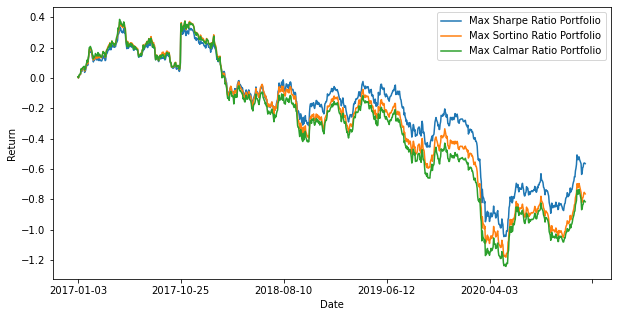

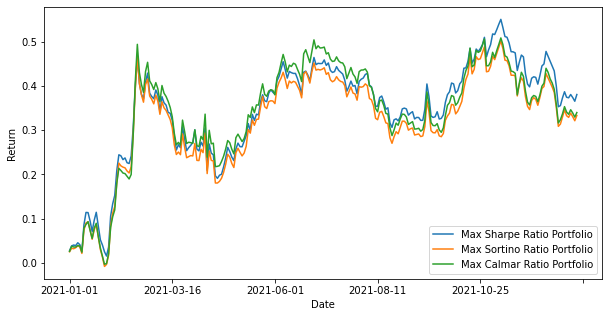

In [50]:
Insample_Result.cumsum().plot(figsize=(10, 5), ylabel = "Return")
OutOfSample_Result.cumsum().plot(figsize=(10, 5), ylabel = "Return")

In [51]:
ret_insample=Insample_Result.mean() * 252
ret_insample

Max Sharpe Ratio Portfolio    -0.144317
Max Sortino Ratio Portfolio   -0.195168
Max Calmar Ratio Portfolio    -0.208533
dtype: float64

In [52]:
ret_out_of_sample = OutOfSample_Result.mean() * 252
ret_out_of_sample

Max Sharpe Ratio Portfolio     0.387048
Max Sortino Ratio Portfolio    0.338854
Max Calmar Ratio Portfolio     0.345569
dtype: float64